## Working with Time Series exercises

In [61]:
import pandas as pd
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt

In [100]:
# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Use the ```sf_temps``` dataset for the following exercises:

In [18]:
temps = data.sf_temps()

##### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [20]:
temps = temps.set_index('date').sort_index()

In [9]:
temps = temps.resample?

In [21]:
temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


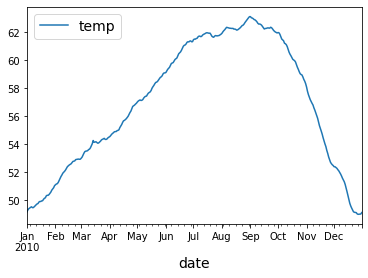

In [101]:
temps.resample('D').mean().plot();

##### 2. Write the code necessary to visualize the minimum temperature over time.

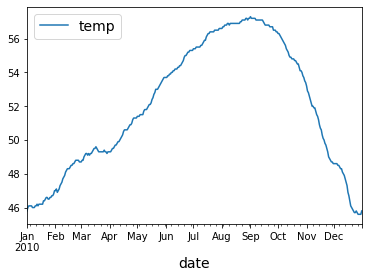

In [102]:
temps.resample('D').min().plot();

##### 3. Write the code necessary to visualize the maximum temperature over time.

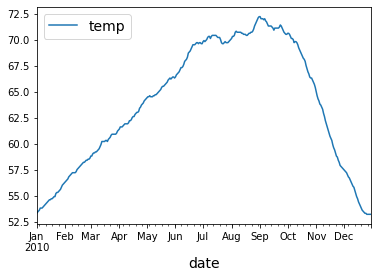

In [103]:
temps.resample('D').max().plot();

##### 4. Which month is the coldest, on average?

In [30]:
temps['month'] = temps.index.month_name()

In [181]:
temps.groupby('month').temp.mean().sort_values().idxmin()
# coldest month on average is January

'January'

##### 5. Which month has the highest average temperature?

In [183]:
temps.groupby('month').temp.mean().idxmax()
# September

'September'

##### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [42]:
min_max_temp = temps.resample('D').temp.agg(['min', 'max'])

In [43]:
min_max_temp.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [44]:
min_max_temp['diff'] = min_max_temp['max'] - min_max_temp['min']

In [48]:
#temps['month'] = temps.index.month_name()
min_max_temp['month'] = min_max_temp.index.month_name()

In [49]:
min_max_temp.head(1)

,min,max,diff,month
date,,,,
2010-01-01,45.8,53.3,7.5,January


In [54]:
min_max_temp.groupby('month').max().sort_values(by='diff', ascending=False).head(1)

,min,max,diff
month,,,
August,57.2,72.2,15.0


In [55]:
# August has the highest daily temperature variability

##### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

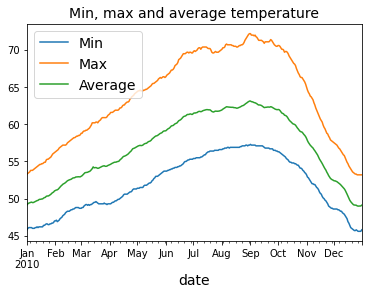

In [104]:
temps.resample('D').min().temp.plot(label='Min')
temps.resample('D').max().temp.plot(label='Max')
temps.resample('D').mean().temp.plot(label='Average')
plt.title('Min, max and average temperature')
plt.legend()
plt.show()

### Use ```seattle_weather``` for the following exercises

In [69]:
df = data.seattle_weather()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [66]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [70]:
df = df.set_index('date').sort_index()

In [73]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

In [75]:
df.head(1)

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,January


##### 1. Which year and month combination has the highest amount of precipitation?

In [79]:
df.groupby(['month', 'year']).max().sort_values(by='precipitation', ascending=False).head(1)

,,precipitation,temp_max,temp_min,wind,weather
month,year,,,,,
March,2015,55.9,20.6,10.6,5.7,sun


*March, 2015*

##### 2. Visualize the amount of monthly precipitation over time.

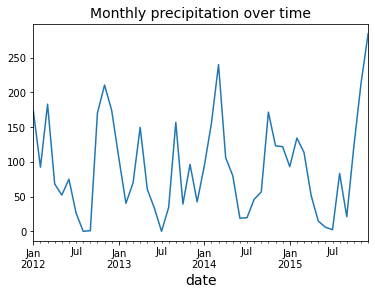

In [105]:
df.resample('M').sum().precipitation.plot()
plt.title('Monthly precipitation over time');

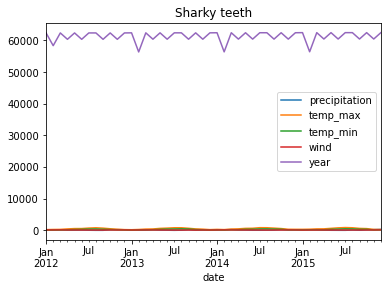

In [91]:
df.resample('M').sum().plot()
plt.title('Sharky teeth');

##### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

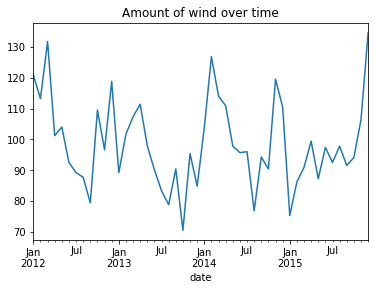

In [99]:
df.resample('M').sum().wind.plot()
plt.title('Amount of wind over time');

##### 4. Which year-month combination is the windiest?

In [107]:
df.groupby(['month', 'year']).sum().sort_values(by='wind', ascending=False).head(1)

,,precipitation,temp_max,temp_min,wind
month,year,,,,
December,2015,284.5,259.8,118.6,134.6


In [199]:
df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

*December, 2015*

##### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?

In [114]:
df[df.weather == 'sun'].year.value_counts().head(1)

2014    211
Name: year, dtype: int64

*2014 was the sunniest year. 211 sunny days per year*

##### 6. In which month does it rain the most?

In [215]:
df[df.weather == 'rain'].month.value_counts().idxmax()

'February'

*February is the rainiest month*

##### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [125]:
df[df.precipitation !=0].month.value_counts().head(1)

December    81
Name: month, dtype: int64

*December*

### Use the ```flights_20k``` dataset for the following exercises:

In [131]:
fl = data.flights_20k()

In [132]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [134]:
fl = fl.set_index('date').sort_index()

In [135]:
fl.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


##### 1. Convert any negative delays to 0.

In [136]:
fl.delay = np.where(fl.delay < 0, 0, fl.delay)

##### 2. Which hour of the day has the highest average delay?

In [140]:
fl['hour'] = fl.index.hour

In [151]:
fl.groupby('hour').mean().nlargest(1, columns='delay') # 3 AM

,delay,distance
hour,,
3,302.5,322.0


##### 3. Does the day of the week make a difference in the delay amount?

In [155]:
fl['day'] = fl.index.day_name()

In [160]:
fl.groupby('day').sum().delay.sort_values() # most delays happen on Friday, least delays on Saturday

day
Saturday     19755
Monday       21354
Sunday       27221
Tuesday      27715
Wednesday    33969
Thursday     38605
Friday       53770
Name: delay, dtype: int64

##### 4. Does the month make a difference in the delay amount?

In [161]:
fl['month'] = fl.index.month_name()

In [163]:
fl.groupby('month').sum().delay.sort_values()

month
March       68732
January     76670
February    76987
Name: delay, dtype: int64

In [165]:
# less delays in March

### Use the ```iowa_electricity``` dataset for the following exercises:

In [175]:
iowa = data.iowa_electricity()

In [168]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [171]:
iowa.head(1)

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361


##### 1. For each row, calculate the percentage of the year's total that energy source provided.

In [177]:
iowa.year = iowa.year.dt.year

In [184]:
iowa.groupby('year').sum()

,net_generation
year,
2001,40651
2002,42528
2003,42107
2004,43236
2005,44145
2006,45473
2007,49778
2008,53086
2009,51859


##### 2. Lineplot of generation over time, color by source

In [186]:
import seaborn as sns

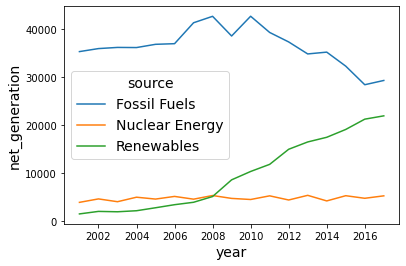

In [188]:
sns.lineplot(data=iowa, x='year', y='net_generation', hue='source');

##### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [194]:
iowa.pivot_table(index='source', columns='year')

net_generation                                            \
year                     2001   2002   2003   2004   2005   2006   2007   
source                                                                    
Fossil Fuels            35361  35991  36234  36205  36883  37014  41389   
Nuclear Energy           3853   4574   3988   4929   4538   5095   4519   
Renewables               1437   1963   1885   2102   2724   3364   3870   

                                                                               \
year             2008   2009   2010   2011   2012   2013   2014   2015   2016   
source                                                                          
Fossil Fuels    42734  38620  42750  39361  37379  34873  35250  32319  28437   
Nuclear Energy   5282   4679   4451   5215   4347   5321   4152   5243   4703   
Renewables       5070   8560  10308  11795  14949  16476  17452  19091  21241   

                       
year             2017  
source                 
Fossil Fuels    29329  
Nuclear Energy   5214  
Renewables      21933

##### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

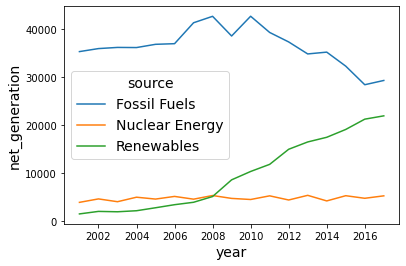

In [195]:
sns.lineplot(data=iowa, x='year', y='net_generation', hue='source');

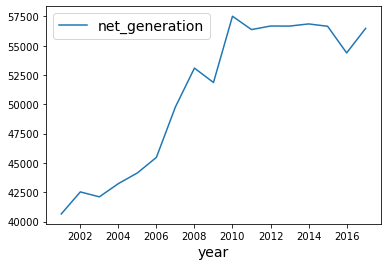

In [197]:
iowa.groupby('year').sum().plot();

##### 5. Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total